###                                         <font color = 'Red'>**MYLO ASSIGNMENT TASK**</font>

### <font color = 'blue'>**Problem Statement**</font>

#### In Mylo parents are asking questions to get answers from other parents in the community.
#### The Target is  to identify the Tag based on the Discussion between the parents in MYLO community given in the dataset.

### <font color = 'blue'>**Dataset Description**</font>

***Given Dataset consists of 4 columns['post_id','question','user_stage','tag']***,

***Training Dataset consists of 107 correctly tagged questions.***

***Test Dataset consists of 34 untagged questions.***

### <font color = 'blue'>**Approach to the Problem Statement**</font>

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preprocessing
    - Convert sentence into lower case
    - Remove Stop Words
    - Stemming or Lemmatization
4. Data Preparation
    - Train Test Split
    - Text to numerical vector using Bag of Words
5. Training and Evaluation


### <font color = 'blue'>**Importing Necessary Libraries**</font>

In [85]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score

###  <font color = 'blue'>**1.Loding the dataset**</font>

In [86]:
text_data =pd.read_csv(r"C:\Users\bangarraju\Downloads\tag_identification_dataset  - train.csv")

In [87]:
text_data

,post_id,question,user_stage,tag
0,1,"Alhamdulilh, blessed with beautiful baby girl,...",pregnant,Announcements&Celebrations
1,2,Breastfeeding mother ko chai pini chaiye usse ...,mother,General Baby
2,3,Hii all as I am preganent with twins on coming...,pregnant,General Pregnancy
3,4,Mujhy mild cramp sa feeling Hai lower main aur...,pregnant,General Pregnancy
4,5,Can I drink lion dates syrup,pregnant,Diet&Nutrition
...,...,...,...,...
102,107,Thenkeww everyone for ur blessing support n su...,mother,Announcements&Celebrations
103,110,i m clicking on shop then showing product page...,mother,MyloSupport
104,111,Hello mommies Kl se mera 40 week start ho jaye...,pregnant,General Pregnancy
105,116,Garbha sanskar kya hota hai?? Or kya music kes...,pregnant,Gossip


In [88]:
text_data.drop(columns='post_id',inplace=True)

### <font color = 'blue'>**Dataset info**</font>

In [89]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    107 non-null    object
 1   user_stage  107 non-null    object
 2   tag         107 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [90]:
text_data.shape

(107, 3)

### <font color = 'blue'>**Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each column**</font>

In [91]:
count = text_data.isnull().sum().sort_values(ascending=False)
percentage = ((text_data.isnull().sum()/len(text_data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
question,0,0.0
user_stage,0,0.0
tag,0,0.0


### <font color = 'blue'>**2.Exploratory Data Analysis**</font>

In [92]:
text_data['tag'].value_counts()

MyloSupport                   19
General Pregnancy             18
Diet&Nutrition                18
General Baby                  15
Gossip                        13
Announcements&Celebrations    13
Love&Relationships            11
Name: tag, dtype: int64

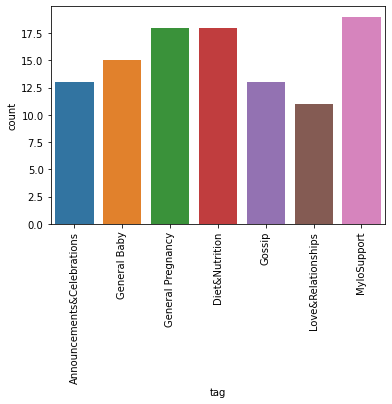

In [93]:
# Countplot
sns.countplot(x='tag',data=text_data)
plt.xticks(rotation=90)
plt.show()

### <font color = 'blue'>**Insights from above**</font>

Parents are mostly discussing regarding the MYLO Support.

And also discussion on on general pregnency and Diet&Nutrition.

In [94]:
text_data['user_stage'].value_counts()

pregnant    59
mother      41
ttc          7
Name: user_stage, dtype: int64

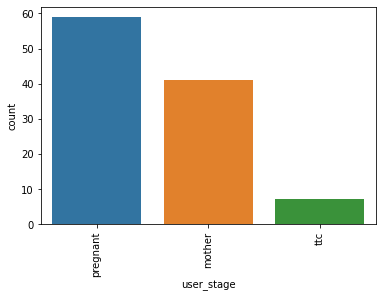

In [95]:
# Countplot
sns.countplot(x='user_stage',data=text_data)
plt.xticks(rotation=90)
plt.show()

### <font color = 'blue'>**Insights from above**</font>

Most of the User_stagers are pregnant.

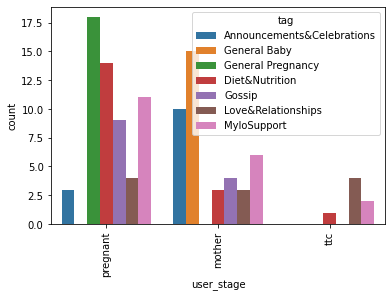

In [96]:
# Countplot
sns.countplot(x='user_stage',hue='tag',data=text_data)
plt.xticks(rotation=90)
plt.show()

### <font color = 'blue'>**Insights from above**</font>

Pregnents are Mostly taking about General pregnency and Diet&Nutrition.
Mothers are Mostly taking about General Baby.

### <font color = 'blue'>**WordCloud**</font>

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
df = text_data['question']

words = ' '.join(df)

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

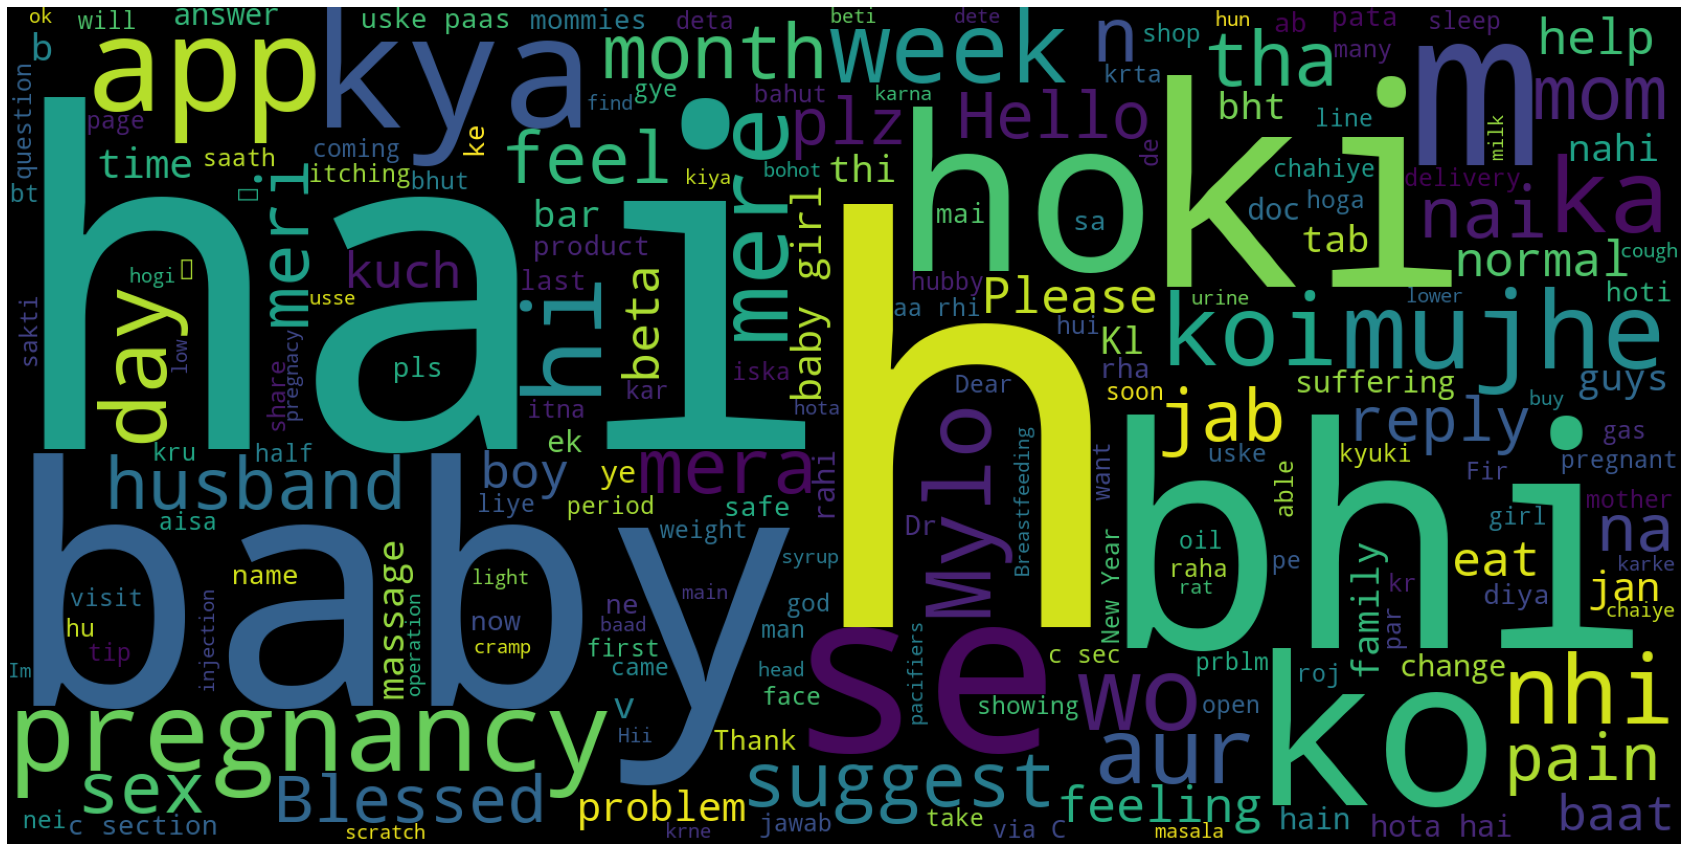

In [16]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### <font color = 'blue'>**Insights from above**</font>

Most words appeared in given questions are baby,pregnency,Mylo,husband....

### <font color = 'blue'>**3.Data Preprocessing**</font>

**Our data exploration ends here. The next step will be preprocess the data in order to make the learning process more smooth.**

Preprocessing steps:
- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization
    

In [ ]:
# def cleaning_reviews(df):
#     messages = list()
#     lines = df['question'].values.tolist()
#     for i in lines:
#         text = i.lower()
#         pattern = re.compile('http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:[0-9a-fA-F][0-9a-fA-F]))+')
#         text = pattern.sub("", text)
#         tokens = nltk.word_tokenize(text)
#         table = str.maketrans('', '', string.punctuation)
#         stripped = [w.translate(table) for w in tokens]
#         words = [word for word in stripped if word.isalpha()]
#         stop_word = set(stopwords.words('english'))
#         stop_word.discard("not")
#         words = [nltk.WordNetLemmatizer().lemmatize(w) for  w in words if not w in stop_word]
#         words = ' '.join(words)
#         messages.append(words)

#     return(messages)

# corpus = cleaning_reviews(text_data)

In [97]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bangarraju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
corpus=[]

for i in range(0, 107):
  review = re.sub('[^a-zA-Z]', ' ', text_data['question'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

### <font color = 'blue'>**Cleaned Corpus**</font>

In [99]:
corpus

['alhamdulilh bless beauti babi girl cesarean',
 'breastfeed mother ko chai pini chaiy uss bach ko ga hogi',
 'hii pregan twin come feb dr suggest c sec week go complt ok not pain till concept iui dr told want take risk suggest take dexa inject prior oper pl suggest mere babi puri tarah matur hong na wait pl repli confus',
 'mujhi mild cramp sa feel hai lower main aur urin bht feel horaha jab kern tu itna nai hta urin ki feel bht horai bar bar jati hun discomfort hai',
 'drink lion date syrup',
 'get honey pacifi india abl find normal pacifi onlyl medic store n onlin',
 'eat masala ot',
 'projesteron inject duphaston high ga acid due ga stomach pain remedi pleas help',
 'breast feed mother babi weight low eat jiis iska weight gain ho',
 'faida uthana hubbi ko pata nahi ki mahan dost ne batya ki pregnaci roj light massag karn se babi halthi hota hai wo bisara roj rat ko tal n nimbu ko mix kark mujh massag kar dete hai pura khu kl wo bht busi lakin fir v massg krne nahi bhula kl mene man

### <font color = 'blue'>**4.Data Preparation**</font>

Let's now prepare the data and build the model.

In [20]:
# # preparing the user_stage column
# text_data.user_stage = text_data['user_stage'].map({'pregnant' : 0,'mother' : 1 , 'ttc' : 2 })

### <font color = 'blue'>**Text to numerical vector conversion using CountVectorizer or TFIDF**</font>

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfid_transformer = TfidfVectorizer()
# tfid_tf = tfid_transformer.fit_transform(corpus).toarray()

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
CV_tf = CV.fit_transform(corpus).toarray()

### <font color = 'blue'>**Pickling CountVectorizer used for Test Data**</font>

In [101]:
import pickle
path="C:\\Users\\bangarraju\\Downloads\\VEctorizer.pkl"
pickle.dump(CV,open(path,"wb"))

### <font color = 'blue'>**Description of data text to numerical conversion**</font>

In [75]:
print("Total unique words:", len(CV.vocabulary_))

print("Type of train_features:", type(CV_tf))

print("Shape of input data", CV_tf .shape)

Total unique words: 883
Type of train_features: <class 'numpy.ndarray'>
Shape of input data (107, 883)


### <font color = 'blue'>**Targetvariable**</font>

In [78]:
target=text_data['tag']

In [28]:
#  target= text_data['tag'].map({'MyloSupport':0, 'Diet&Nutrition':1, 'General Pregnancy':2, 
#                   'General Baby':3, 'Announcements&Celebrations':4, 'Gossip':5, 'Love&Relationships':6})

### <font color = 'blue'>**Trian Test Split**</font>

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_tf,target,test_size = 0.20, random_state = 0)

### <font color = 'blue'>**5. Training and Evaluation**</font>

In [30]:
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

### <font color = 'blue'>**Predection and Evalution Of Model Using Accuracy Metric**</font>

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = MNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.5454545454545454

### <font color = 'blue'>**Confusion Matrix**</font>

Text(69.0, 0.5, 'Actual')

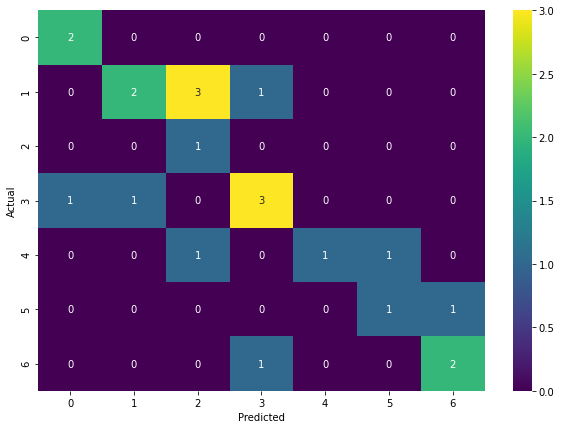

In [32]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

### <font color = 'blue'>**Pickling the Model for predection on test data**</font>

In [34]:
import joblib
joblib.dump(RF,"C:\\Users\\bangarraju\\Downloads\\BEstmodel.pkl") 

['C:\\Users\\bangarraju\\Downloads\\BEstmodel.pkl']

In [35]:
y_pred = RF.predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

### <font color = 'blue'>**Comparing Actual and Predicted Values**</font>

In [36]:
Actual_predicted=pd.DataFrame(y_pred,y_test)

In [37]:
Actual_predicted

,0
tag,
General Pregnancy,General Pregnancy
General Pregnancy,Diet&Nutrition
General Pregnancy,Love&Relationships
General Pregnancy,General Pregnancy
Diet&Nutrition,Diet&Nutrition
MyloSupport,MyloSupport
MyloSupport,MyloSupport
Diet&Nutrition,MyloSupport
Gossip,General Baby


Text(69.0, 0.5, 'Actual')

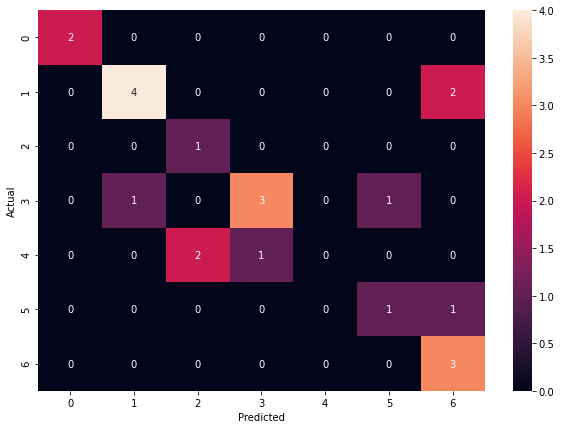

In [38]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**DecisionTreeClassifier**</font>

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = DT.predict(X_test)
accuracy_score(y_test, y_pred)

0.45454545454545453

Text(69.0, 0.5, 'Actual')

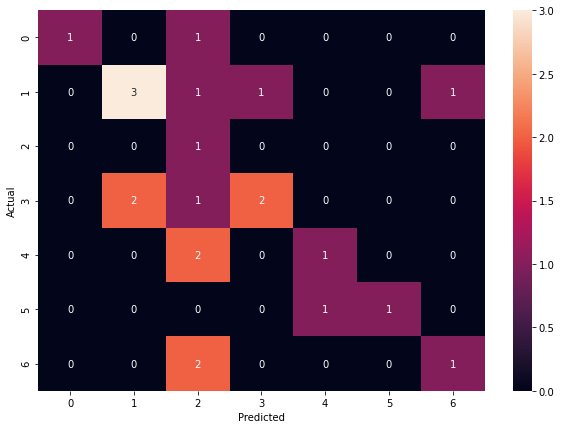

In [46]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**Support vector Machine**</font>

In [47]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, y_train)

SVC()

In [48]:
y_pred =svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.2727272727272727

Text(69.0, 0.5, 'Actual')

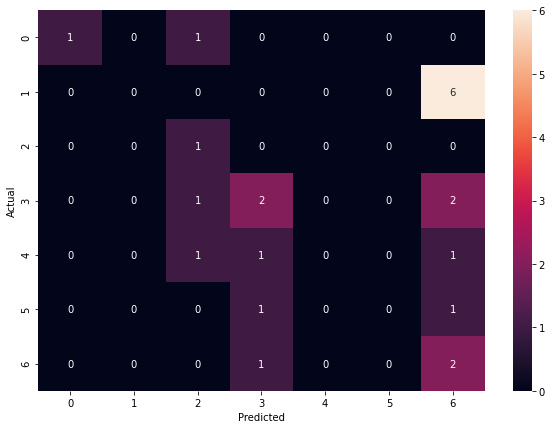

In [49]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**XGBClassifier**</font>

In [50]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
y_pred = XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.45454545454545453

Text(69.0, 0.5, 'Actual')

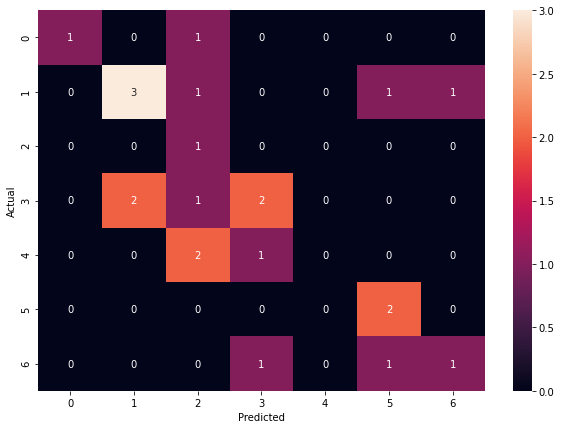

In [52]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**BernoulliNB**</font>

In [53]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [54]:
y_pred = BNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.13636363636363635

Text(69.0, 0.5, 'Actual')

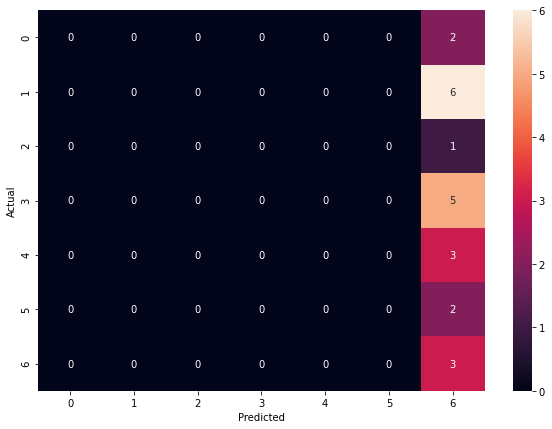

In [55]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**LinearDiscriminantAnalysis(LDA)**</font>

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Lda=LinearDiscriminantAnalysis()

In [83]:
Lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [84]:
y_pred = Lda.predict(X_test)
accuracy_score(y_test, y_pred)

0.2727272727272727

### <font color = 'blue'>**Comparing All the Models**</font>

In [105]:
values = {'MODEL':['RandomForestClassifier','MultinomialNB','DecisionTreeClassifier','XGBClassifier','Support Vector Classifier','LinearDiscriminantAnalysis','BernoulliNB'],
          'ACCURACY':[0.6363636363636364,0.5454545454545454,0.45454545454545453,0.45454545454545453,0.2727272727272727,0.2727272727272727,0.13636363636363635]}
All_Model_Comparison = pd.DataFrame(values)


In [106]:
All_Model_Comparison

,MODEL,ACCURACY
0,RandomForestClassifier,0.636364
1,MultinomialNB,0.545455
2,DecisionTreeClassifier,0.454545
3,XGBClassifier,0.454545
4,Support Vector Classifier,0.272727
5,LinearDiscriminantAnalysis,0.272727
6,BernoulliNB,0.136364


### <font color = 'blue'>**Key Highlights**</font>

From all the above models Randomforest classifer is best model.


### <font color = 'Green'>**Test Data Predictions**</font>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [108]:
dataset = pd.read_csv(r'C:\Users\bangarraju\Downloads\tag_identification_dataset  - test.csv')
dataset.head()

,post_id,question,user_stage,tag
0,75,Unable to upload my profile pic,pregnant,NaN
1,90,I dont have any problm in morning whole day bu...,pregnant,NaN
2,94,Hi I am not conformed the pregnancy but I am e...,pregnant,NaN
3,102,Best fresh fruit juice for six months old baby,mother,NaN
4,108,Which storage bag is good to store breast milk...,mother,NaN


### <font color = 'Green'>**Text preprocessing Libraries**</font>

In [109]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bangarraju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing steps:
- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization

In [110]:
corpus=[]

for i in range(0,34):
  review = re.sub('[^a-zA-Z]', ' ', dataset['question'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

### <font color = 'Green'>**Loding Pickled Vectorizer**</font>

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
path="C:\\Users\\bangarraju\\Downloads\\VEctorizer.pkl"
cv=pickle.load(open(path,"rb"))

In [112]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(34, 883)

### <font color = 'Green'>**Loding Pickled Model for Predection**</font>

In [113]:
import joblib
classifier = joblib.load("C:\\Users\\bangarraju\\Downloads\\BEstmodel.pkl")

### <font color = 'Green'>**Predections**</font>

In [114]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

['MyloSupport' 'General Pregnancy' 'General Baby' 'General Baby'
 'General Baby' 'Diet&Nutrition' 'Diet&Nutrition' 'General Pregnancy'
 'Diet&Nutrition' 'General Pregnancy' 'Diet&Nutrition' 'General Baby'
 'General Pregnancy' 'MyloSupport' 'General Pregnancy' 'Diet&Nutrition'
 'Announcements&Celebrations' 'Gossip' 'Announcements&Celebrations'
 'Announcements&Celebrations' 'MyloSupport' 'MyloSupport' 'General Baby'
 'General Pregnancy' 'Diet&Nutrition' 'MyloSupport'
 'Announcements&Celebrations' 'MyloSupport' 'General Pregnancy'
 'MyloSupport' 'MyloSupport' 'MyloSupport' 'General Baby' 'MyloSupport']


In [115]:
dataset['tag'] = y_pred.tolist()

In [116]:
dataset

,post_id,question,user_stage,tag
0,75,Unable to upload my profile pic,pregnant,MyloSupport
1,90,I dont have any problm in morning whole day bu...,pregnant,General Pregnancy
2,94,Hi I am not conformed the pregnancy but I am e...,pregnant,General Baby
3,102,Best fresh fruit juice for six months old baby,mother,General Baby
4,108,Which storage bag is good to store breast milk...,mother,General Baby
5,109,Mera 3rd March ko 2nd anniversary hai mere hus...,ttc,Diet&Nutrition
6,112,I'm 10th week pregnant shall I take folic acid...,pregnant,Diet&Nutrition
7,113,"Hello All, Today we git to know that my baby h...",mother,General Pregnancy
8,114,hello frnds meri beti 4 months ki hai ab mere ...,mother,Diet&Nutrition
9,115,29 week one day ka matlab 30th week started?,pregnant,General Pregnancy


### <font color = 'Green'>**Converting the Predections TO CSV File**</font>

In [ ]:
dataset.to_csv(r"C:\Users\bangarraju\Downloads\MuppidiBangarraju.csv")

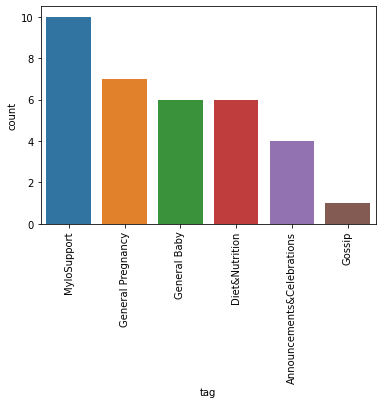

In [117]:
sns.countplot(x='tag',data=dataset)
plt.xticks(rotation=90)
plt.show()

## Answers to the the Given Questions

####  1.Accuracy - the percentage of questions that you correctly identify

In [ ]:
65% of Questions i identified correctly from my model prections.

#### 2.Approach to the Problem

In [ ]:
step1:--In order to approach to that problem i done some Text Preprocessing By using NLTK tool kit.
step2:--Converted the Entire Text data to numerical vectors By using Count Vectorizer or Term Frequency and inverse Document Frequency(TFIDF).
step3:--I trained multiple models for getting Best Results.
step4:-- I used Accuracy metric for model Evolution.

#### 3.Turn around time

In [ ]:
I took one day to complete the problem statement.